# Создание модели прогнозирования оттока клиентов.
# Кластеризация клиентов фитнес-клуба

## Содержание

### [Обзор данных](#overview)

### [Предобработка данных](#processing)

### [Исследовательский анализ данных](#eda)

### [Построение модели прогнозирования оттока клиентов](#model)

### [Кластеризация клиентов](#clustering)

### [Общий вывод и рекомендации](#summary)

---

**Краткое описание:** Заказчик - сеть фитнес-центров «Культурист-датасаентист». Необходимо проанализировать анкетные данные клиентов, сформировать их типичные портреты, проанализировать основные признаки, наиболее влияющие на отток, научиться прогнозировать вероятность оттока каждого клиента и разработать рекомендации по повышению качества работы с клиентами.
    
**Цель проекта:** Разработать стратегию взаимодействия с клиентами на основе аналитических данных.
    
**План работы:**
1. выгрузить данные, осуществить первичный обзор;
2. переименовать колонки, привести наименования к "змеиному регистру";
2. определить, есть ли пропуски в данных; заполнить пропуски или удалить строки с пропусками;
3. измененить тип данных;
4. проверить данные на наличие явных и неявных дубликатов, исправить данные;
5. провести исследовательский анализ данных (анализ средних значений, стандартных отклонений, гистограмм распределения, матрицы корреляции);
6. построить модель прогнозирования оттока клиентов;
7. сделать кластеризацию клиентов;
8. сформировать вывод, полученный из результатов анализа;
9. сделать рекомендации по работе с клиентами.

## Обзор данных
<a class='anchor' id='overview'></a>

In [77]:
# загружаем нужные библиотеки

import os
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import itertools

In [78]:
# загружаем данные

# Путь для Colaboratory
pth1 = 'gym_churn.csv'
# Путь для Jupyter Notebook в Практикуме
pth2 = '/datasets/gym_churn.csv'
# Локальный путь
pth3 = r'C:\Users\WANTNEON\Desktop\Проекты практикум\Машинное обучение\gym_churn.csv'
    
if os.path.exists(pth1):
    data = pd.read_csv(pth1)
    print('Данные загружены в Colaboratory')
elif os.path.exists(pth2):
    data = pd.read_csv(pth2)
    print('Данные загружены в Jupyter Notebook')
elif os.path.exists(pth3):
    data = pd.read_csv(pth3)
    print('Данные загружены локально')
else:
    print('Что-то пошло не так')  

Данные загружены в Colaboratory


In [79]:
# создаем функцию для первичного обзора данных

def first_check(dataset):

    print('Первые 10 строк таблицы \n')
    display(dataset.head(10))

    print()
    print('Последние 10 строк таблицы \n')
    display(dataset.tail(10))

    print()
    print('Информация о таблице \n')   
    print(dataset.info())

    print()
    print('Характеристики чисел в таблице \n')  
    display(dataset.describe())

    print()
    print('Наименование колонок \n')  
    print(dataset.columns)

In [80]:
# применяем функцию для первичного обзора

first_check(data)

Первые 10 строк таблицы 



,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0



Последние 10 строк таблицы 



,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
3990,1,0,1,0,1,12,0,33,31.771147,8.0,10,1.831577,1.924509,0
3991,1,0,1,0,1,6,0,33,69.301270,6.0,1,1.367289,1.435721,0
3992,0,1,1,1,1,12,0,31,223.102448,8.0,4,3.855916,3.797062,0
3993,0,1,1,0,1,1,0,33,231.778628,1.0,3,1.418791,1.450442,0
3994,1,1,0,0,1,1,0,26,31.066721,1.0,1,1.157451,0.269597,1
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0
3999,1,0,1,0,0,12,1,30,178.861814,12.0,1,1.101832,1.035270,0



Информация о таблице 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total       

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000



Наименование колонок 

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')


**Итоги обзора данных и предположения:**

1. В таблице отсутствуют пропуски. Всего 4000 строк и 14 колонок. Колонки следует поменять местами для большего удобства.

2. Наименование колонок необходимо привести к "змеиному_регистру".

3. Все значения имеют тип float или тип int, включая категориальные, которые обозначены как 0 - нет и 1 - да. Можно поменять тип в колонке "Month_to_end_contract" на int, т.к. в ней отражаются целые числа.

4. В колонках с категориальными значениями нет лишних чисел. Если смотреть на средние значения, то можно предположить, что примерно 50 на 50 распределены:
* мужчины и женщины (в описании к данным не дано определение, каким значением обозначены мужчины, а каким - женщины);
* посетители по партнерской программе и нет;
* посетители групповых программ и нет.

  Также можно предположить, что:
* большинство клиентов проживает в районе расположения фитнес-клуба;
* в базе есть телефоны большинства посетителей.
* меньшее число людей пришло в рамках акции «приведи друга»;
* меньшее количество посетителей ушли из клуба в текущем месяце.

5. Абонемент выдается минимум на 1 месяц, максимум - на 12 месяцев. У 50% клиентов абонементы были выданы на 1 месяц. У 25% - на 6 и более месяцев. Среднее в 4.6 месяцев сильно отличается от медианного значения в 1 месяц, этоо том, что выбросы искажают среднее. Стандартное отклонение составляет 4.5, что говорит о большой разбежке в данных. Такая же ситуация в колонке с количеством месяцев до окончания действия абонемента.

6. Минимальный возраст посетителей - 18 лет, максимальный - 41 год. Среднее и медианное значения равны 29 годам, а стандартное отклонение - 3.2, что не так много. В этой колонке данные распределены нормально. 

7. Для количества месяцев с момента первого обращения в фитнес-центр минимальное значение составляет 0, а максимальное - 31 месяц. Несмотря на то, что среднее и медианное значения не сильно отличаются и равны 3.7 и 3 соответственно, стандартное отклонение также равно 3.7. В данном случае это слишком много, т.к. 75% посетителей имеют lifetime 5 и менее месяцев. В колонке есть выбросы.

8. В колонках со средними значениями частоты посещений и суммарной выручкой от других услуг среднее не сильно отличается от медианного значения, а стандартное отклонение в пределах 25 и 75 процентилей. Данные распределены нормально. Судя по максимальным значениям есть единичные выбросы, которые не влияют на основные показатели.

Проверим данные предположения в дальнейшем анализе.

## Предобработка данных
<a class='anchor' id='processing'></a>

In [81]:
# работа с колонками
# приведем наименования колонок к нижнему регистру

data.columns = data.columns.str.lower()

# изменяем порядок колонок в таблице

data = data[['gender', 'age', 'near_location', 'partner', 'promo_friends',
             'phone', 'group_visits', 'churn', 'contract_period',
             'month_to_end_contract', 'lifetime', 'avg_class_frequency_total',
             'avg_class_frequency_current_month',
             'avg_additional_charges_total']]

data.head() # проверяем, все ли получилось

,gender,age,near_location,partner,promo_friends,phone,group_visits,churn,contract_period,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,avg_additional_charges_total
0,1,29,1,1,1,0,1,0,6,5.0,3,0.020398,0.000000,14.227470
1,0,31,1,0,0,1,1,0,12,12.0,7,1.922936,1.910244,113.202938
2,0,28,1,1,0,1,0,0,1,1.0,2,1.859098,1.736502,129.448479
3,0,33,1,1,1,1,1,0,12,12.0,2,3.205633,3.357215,62.669863
4,1,26,1,1,1,1,0,0,1,1.0,3,1.113884,1.120078,198.362265


In [82]:
# изменяем тип данных колонки 'month_to_end_contract'

data['month_to_end_contract'] = data['month_to_end_contract'].astype('int')

In [83]:
# проверим, нет ли полных дубликатов

data.duplicated().sum()

0

## Исследовательский анализ данных
<a class='anchor' id='eda'></a>

В первичном обзоре данных мы предположили, что в таблице содержится больше информации о тех, кто продолжил посещать клуб, нежели о тех, кто из клуба ушел. Посмотри как выглядит соотношение данных групп в количественном и процентном виде.

In [84]:
churn_sum = data.groupby('churn').agg({'churn' : 'count'})

churn_sum['percent'] = round(
    churn_sum['churn'] / churn_sum['churn'].sum() * 100
    )

churn_sum

,churn,percent
churn,,
0,2939,73.0
1,1061,27.0


Хороший результат: 73% посетителей продолжили посещать фитнес-центр. Хотелось бы, чтобы еще 27% занимались своим здоровьем, поэтому продолжим анализ.

Посмотрим средние значения показателей для тех, кто продолжил ходить в фитнес-клуб, и для тех, кто ходить перестал.

Напомним, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал.

Для категориальных показателей следует отметить, что чем больше среднее, тем больше тех, у кого значение 1 (да), а чем меньше среднее, тем больше тех, у кого значение 0 (нет).

In [85]:
data.groupby('churn').agg('mean').T

churn,0,1
gender,0.510037,0.510839
age,29.976523,26.989632
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
group_visits,0.464103,0.268615
contract_period,5.747193,1.728558
month_to_end_contract,5.283089,1.662582
lifetime,4.711807,0.990575


Из средних показателей видно, что:
* отток не зависит от пола, значения одинаковые;
* в отток попадают более молодые посетители - 27 лет, у не оттока среднее значение составляет 30 лет;
* в отток попадает больше тех, кто проживает в другом районе;
* те, кто бросил заниматься, с большей вероятностью не пользовались промо-акцией или партнерской программой;
* отток не зависит от наличия телефона в базе, значения одинаковые;
* в отток попадает больше тех, кто не посещал групповые занятия;
* среднее значение периода действия абонемента для оттока составляет 1.7, а для постоянных клиентов - 5.7 месяца;
* почти такие же значения для периода для количества месяцев до окончания абонемента, т.е. попавшие в отток с меньшей вероятностью приобретают абонементы на длительный срок;
* средний lifetime оттока равен 1 месяцу, а не оттока - 4.7 месяца;
* в среднем постоянные клиенты посещают фитнес-центр 2 раза в неделю, а попавшие в отток - 1.5 раза;
* такая же ситуация и в среднем количестве посещений за предыдущий месяц, но у оттока значение уменьшается до 1 раза;
* средние траты на дополнительные услуги фитнес-центра для оттока составляют 115 рублей, а для постоянных клиентов немного больше - 158 рублей.

Теперь посмотрим на столбчатые гистограммы и плотность распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток).

In [86]:
# создаем функцию для отображения гистограммы и плотности распределения

def histogram(column):

    plt.figure(figsize=(20, 5))

    ax1 = plt.subplot(1, 2, 1)
    sns.distplot(data.loc[data['churn'] == 0, column], bins=20, color='green')
    plt.title(
        'Распределение значений колонки  \n {} для не попавших в отток'
        .format(column)
        )
    plt.xlabel('Значения колонки {}'.format(column))
    plt.ylabel('Плотность')
    
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    sns.distplot(data.loc[data['churn'] == 1, column], bins=20, color='orange')
    plt.title(
        'Распределение значений колонки  \n {} для попавших в отток'
        .format(column)
        )
    plt.xlabel('Значения колонки {}'.format(column))
    plt.ylabel('Плотность')


    plt.show() 

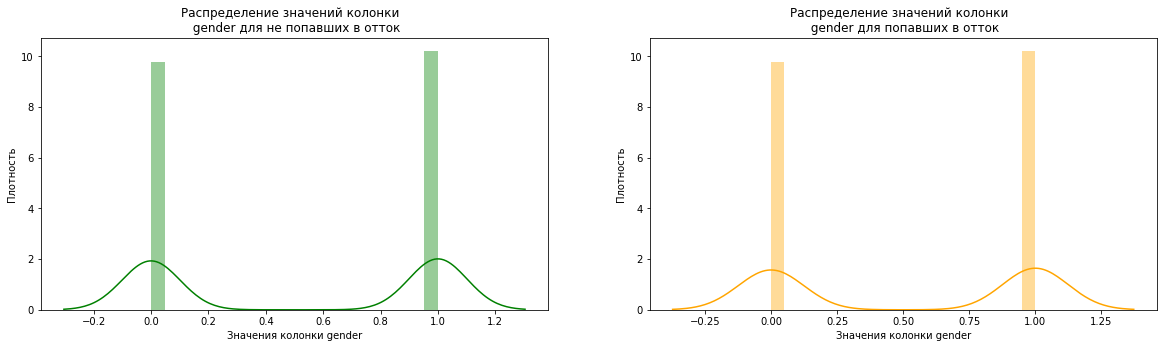

In [87]:
histogram('gender')

Нет каких-то различий в распределении мужчин и женщин среди попавших и не попавших в отток.

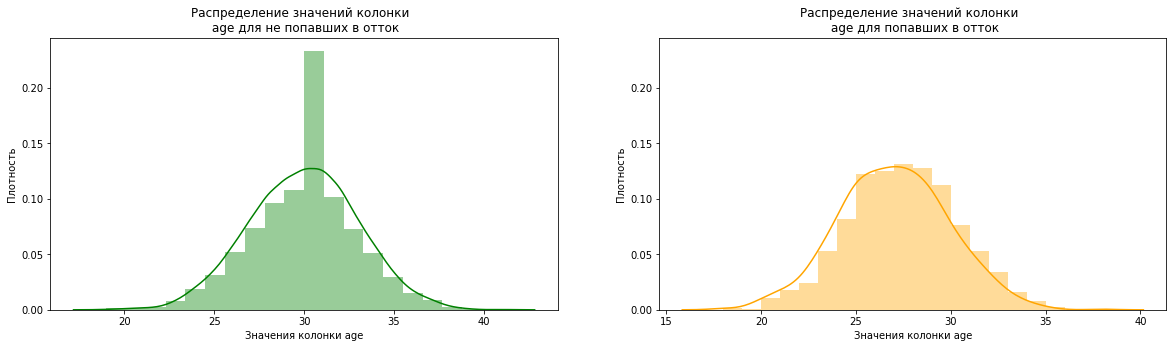

In [88]:
histogram('age')

Распределение возраста в обоих случаях нормальное. Среди продолжающих заниматься очень выделяются тридцатилетние. У тех, кто ушел, пик смещен к 27 годам, но он никак особо не выделяется. Возможно, отток частично связан с возрастом клиентов.

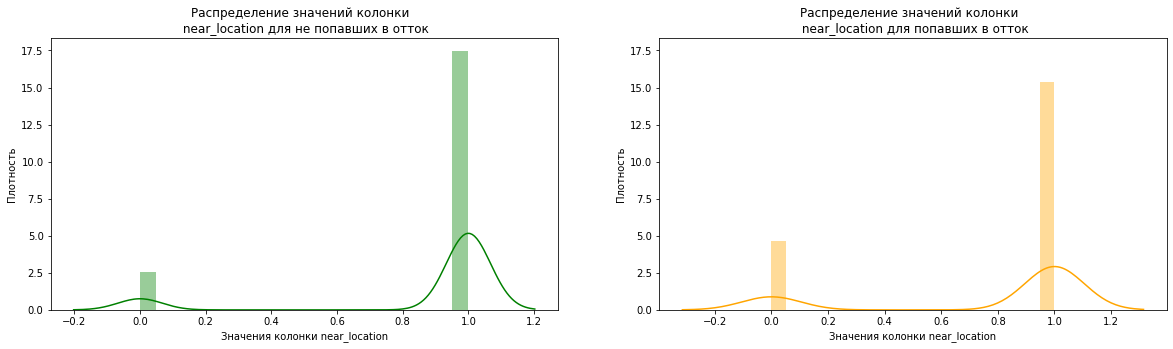

In [89]:
histogram('near_location')

Как и у оттока, так и не у него большинство посетителей живут рядом с фитнес-центром, но у оттока процент тех, кто не живет в том же районе, больше. Это может говорить о том, что этот показатель имеет вес.

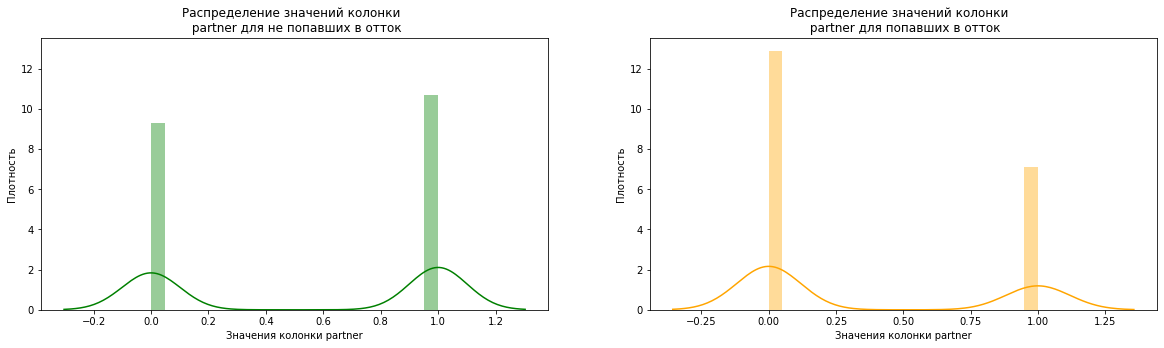

In [90]:
histogram('partner')

Продолжающие посещать фитнес-центр включают в себя почти одинаковое соотношение сотрудников компании-партнёра и тех, кто ходит самостоятельно. Последних немного меньше.

У оттока явно противоположная ситуация: те, кто ходил сам, чаще бросают посещение, чем те, кто ходит от организации.

Возможно данный показатель имеет значение для оттока.

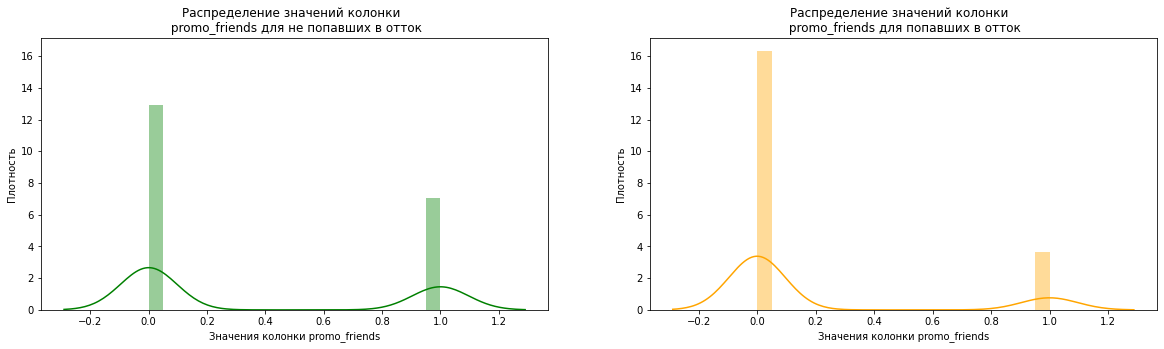

In [91]:
histogram('promo_friends')

Большинство посетителей не использовало промо-код для покупки первого абонемента.

Тот, кто использовал промо-код с большей вероятностью продолжает посещать фитнес-клуб, чем тот, кто этого не сделал. Этот показатель также может быть важен для принятия решения об окончании посещений.

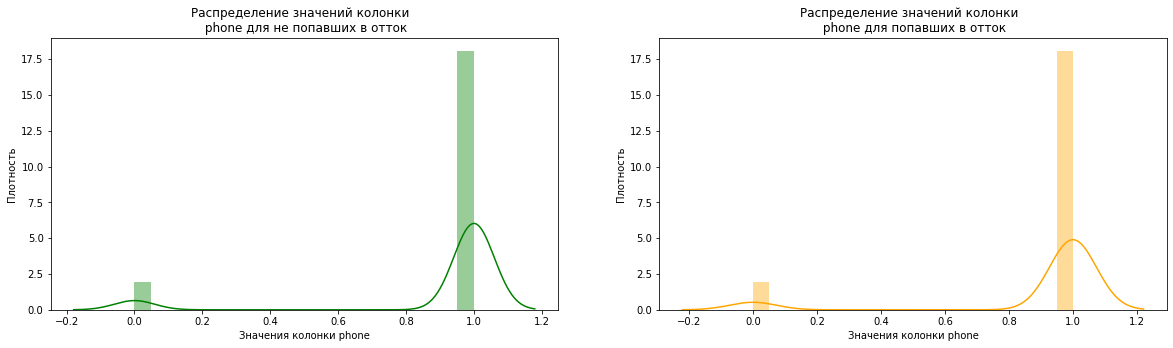

In [92]:
histogram('phone')

Большинство посетителей предоставило свои телефоны.

Предоставление контактного телефона никак не влияет на уход из фитнес-клуба, т.к. распределение в обоих случаях одинаковое. 

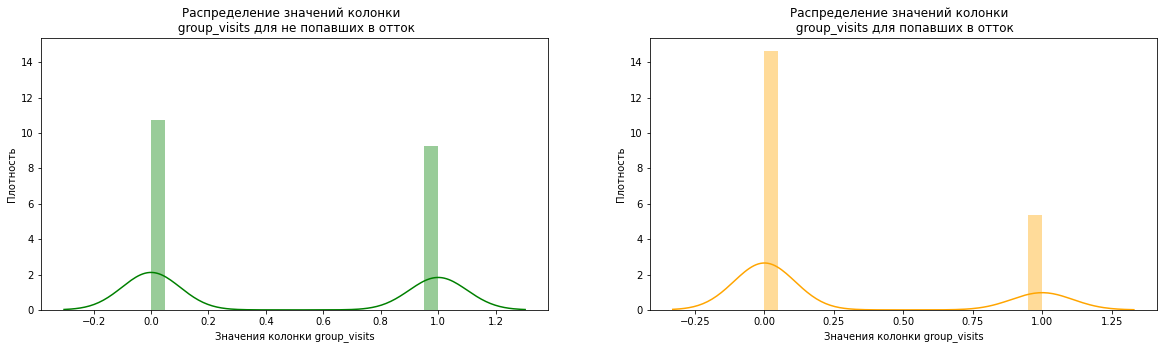

In [93]:
histogram('group_visits')

У не попавших в отток соотношение тех, кто посещал групповые занятия, и тех, кто этого не делал, почти одинаковое, последних немного больше.

В оттоке другая ситуация: большинство ушедших из фитнес-центра не посещало групповых занятий.

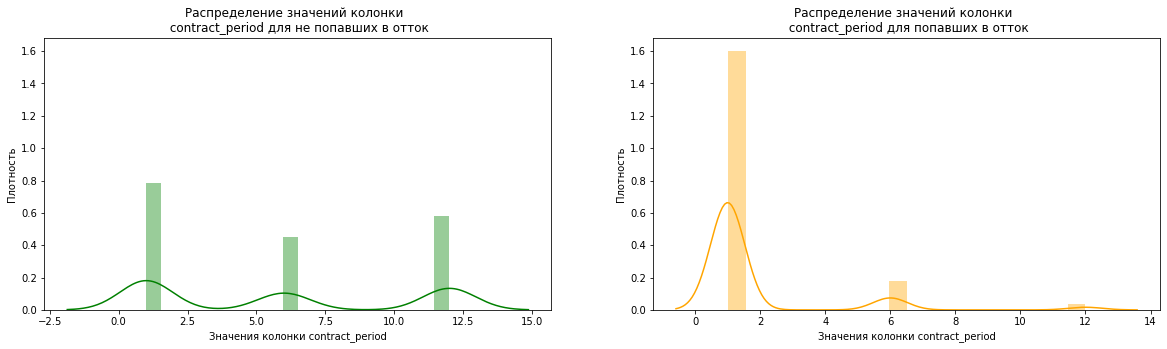

In [94]:
histogram('contract_period')

Большинство посетителей, не попавших в отток, приобретает абонементы на 1 месяц, далее - на 12 месяцев и 6 месяцев.

У оттока также большинство приобрело абонемент на 1 месяц, но только незначительный процент посетителей имело абонемент на 6 или 12 месяцев.

Возможно, период абонемента имеет значение для оттока.

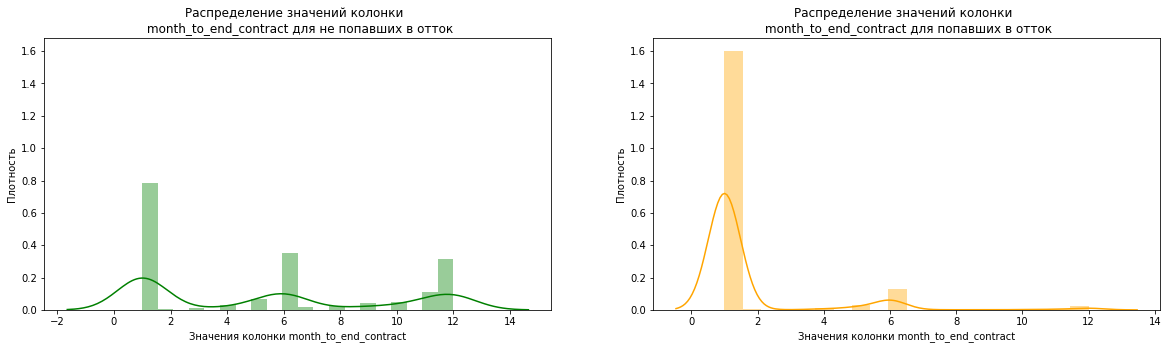

In [95]:
histogram('month_to_end_contract')

Количество месяцев до окончания действия абонемента показывает примерно такую же ситуацию, что и в предыдущем случае.

Скорее всего, это из-за взаимосвязи данных показателей.

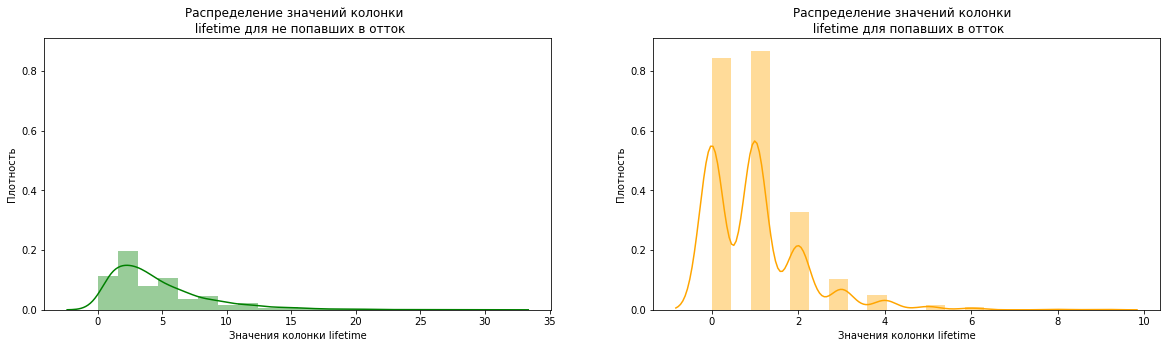

In [96]:
histogram('lifetime')

Количество месяцев с момента первого посещения у постоянных клиентов варируется от 0 до 31 месяца, а большинство значений не превышает 6 месяцев.

Для оттока максимальный lifetime составил 9 месяцев. Большинство строк имеет значения 0 или 1 месяц.

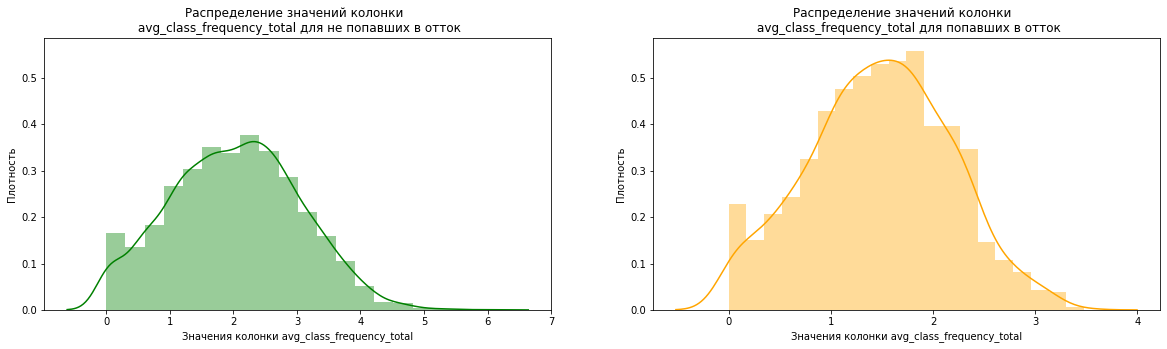

In [97]:
histogram('avg_class_frequency_total')

У тех, кто не попал в отток, пик среднего количества посещений в неделю находится между двумя и тремя, а у оттока - между одним и двуми посещениями.

Можно предположить, что один из признаков дальнейшего оттока - малое количество посещений фитнес-центра.

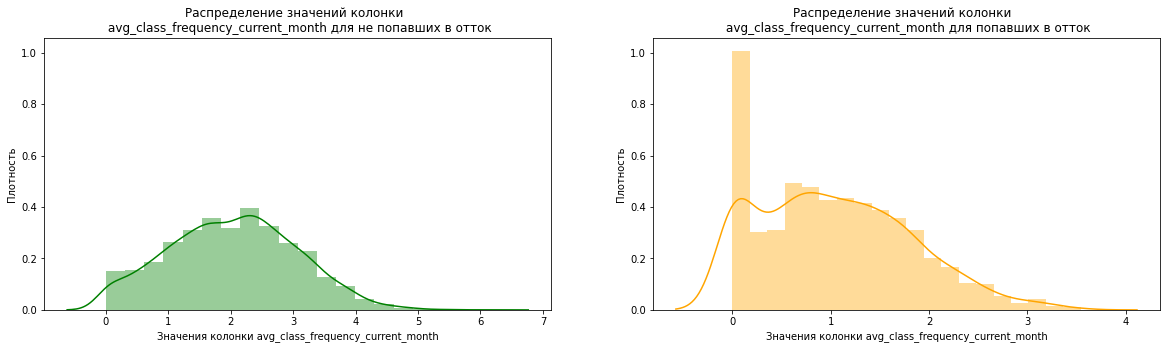

In [98]:
histogram('avg_class_frequency_current_month')

Если смотреть на этот же показатель, но за последний месяц, то у не попавших в отток график похож на предыдущий, пик также расположен между двумя и тремя посещениями в неделю.

У оттока большинство значений - 0 посещений. Можно предположить, что покупка абонемента - это еще не гарантия того, что клиент им воспользуется.

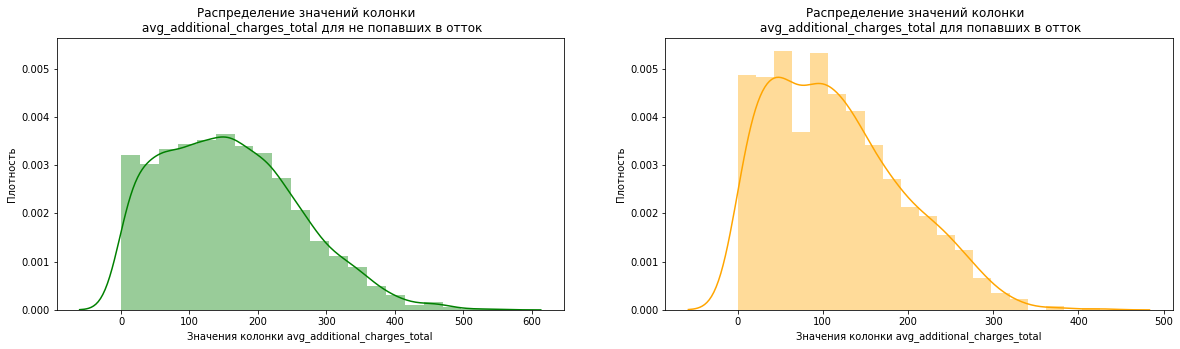

In [99]:
histogram('avg_additional_charges_total')

Постоянные клиенты тратят на сопутствующие услуги немного больше, чем те, кто ушел из фитнес-центра: пик находится между 150-200 рублями. У оттока есть два пика, которые находятся между 0 и 120 рублями.

Теперь построим матрицу корреляций для всех показателей, чтобы определить, как они зависят друг от друга.

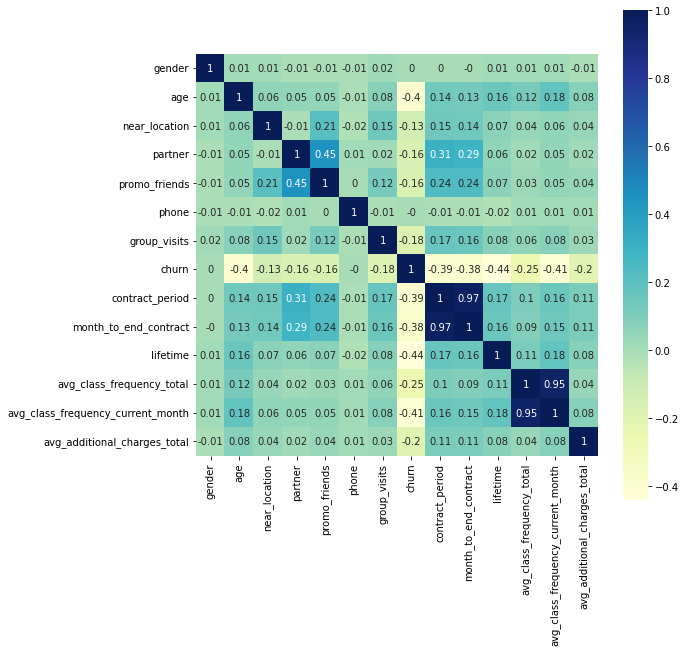

In [100]:
plt.figure(figsize=(9,9))
sns.heatmap(round(data.corr(), 2), annot=True, square=True, cmap='YlGnBu')
plt.show()

Сильно коррелируют только две пары признаков:
1. среднее количество посещений в неделю за прошедший месяц и за все время;
2. продолжительность действия абонемента и количество месяцев до окончания его действия.

Корреляция в 0.45 у тех, кто приходит по партнерской программе, и тех, кто пользуется промо-кодом от друзей. Можно предположить, что с большей вероятностью в обеих колонках будет стоять одинаковое значение.

Также можно сказать, что посетитель по партнерской программе имеет абонемент с продолжительным сроком, т.к. корреляция между этими признаками составляет 0.31.

С показателем оттока все признаки коррелируют в отрицательную сторону. Это означает, что если клиент продолжает посещать фитнес-центр, то с большей вероятности другие признаки будут показывать значение 1 или большее значение для некатегориальных признаков.

У churn отсутсвует или минимальная корреляция с тратами на доп. услуги, посещением групповых занятий, наличием телефона в базе, промо-кодом, партнерской программой, проживанием в том же районе, возрастом и полом.

Слабая отрицательная коррелиция с оттоком характерно для lifetime (0.44), среднего количества посещений в неделю за предыдущий месяц (0.41), периода действия абонемента (0.39), периода до окончания действия абонемента (0.38), среднего количества посещений в неделю за все время (0.25).






**Вывод**

Из исследовательского анализа данных можно сделать следующие выводы:

1. вероятность оттока не зависит от пола и наличия телефона в базе;
    

2. вероятность оттока менее зависит от возраста, района проживания, использования промо-акции или партнерской программы, посещения групповых занятий и средних трат на дополнительные услуги;
    

3. вероятность оттока более зависит от периода действия абонемента и, соответственно, периода до его окончания, количества посещений в неделю, особенно в последний месяц, а также от продолжительности посещения фитнес-центра.

## Построение модели прогнозирования оттока клиентов
<a class='anchor' id='model'></a>

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце.

Подготовим данные для того, чтобы можно было передать их на вход модели. Создадим датафрейм X, в котором сохраним только признаки, а переменной y передадим значения целевой переменной churn.

In [101]:
X = data.drop('churn', axis = 1)
y = data['churn']

Теперь разделим выборку на тестовую (train) и валидационную (test) в пропорциях 80% к 20%.

In [102]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
    )

In [103]:
# проверим правильность разбиения на выборки

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3200, 13)
(800, 13)
(3200,)
(800,)


Перейдем к моделям. Они будут обучаться логистической регрессией и случайным лесом. Для этого сформируем список моделей и создадим функцию для их обучения, которая принимает на вход список моделей и данные, обучает модели, делает прогнозы на валидационной выборке и выводит метрики. В нашем случае это будут accuracy, precision и recall.

In [104]:
# формируем список моделей

models = [
          LogisticRegression(random_state=0, solver='liblinear'),
          RandomForestClassifier(random_state=0)
          ]

In [105]:
# содаем функцию для обучения моделей

def make_prediction(model_name, X_train, y_train, X_test, y_test):
    model = model_name
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(
        ' Accuracy: {:.2f} \n Precision: {:.2f} \n Recall: {:.2f} \n'.format(
            accuracy_score(y_test, y_pred),
            precision_score(y_test, y_pred),
            recall_score(y_test, y_pred)
        )
    )

In [106]:
# применяем функцию для каждого способа обучения

for mod in models:
    print(mod)
    make_prediction(mod, X_train, y_train, X_test, y_test)

LogisticRegression(random_state=0, solver='liblinear')
 Accuracy: 0.93 
 Precision: 0.86 
 Recall: 0.83 

RandomForestClassifier(random_state=0)
 Accuracy: 0.91 
 Precision: 0.83 
 Recall: 0.81 



**Вывод**

Метрики
    
accuracy (доля верно угаданных ответов из всех прогнозов),
    
precision (доля правильных ответов только среди целевого класса),
    
recall (сколько реальных объектов 1 класса получилось обнаружить)
    
немного выше у логистической регрессии, чем у случайного леса, следовательно, логистическая регрессия лучше подходит для решения поставленной задачи.

## Кластеризация клиентов
<a class='anchor' id='clustering'></a>

Прежде, чем работать с алгоритмами кластеризации, стандартизируем данные.

In [107]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)
linked = linkage(X_sc, method = 'ward')

Теперь нарисуем дендрограмму.

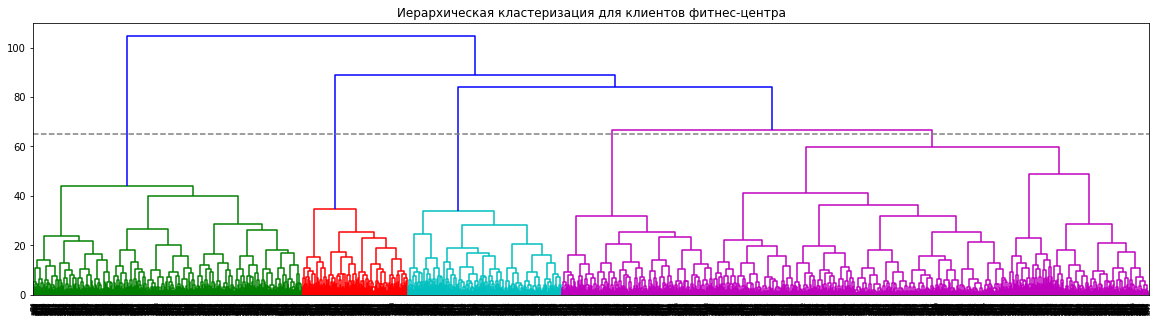

In [108]:
plt.figure(figsize=(20, 5))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация для клиентов фитнес-центра')
plt.axhline(y=65, color='grey', linestyle='--')
plt.show() 

В итоге получили предложенное оптимальное число кластеров 5 — пять разных цветов на графике. Об этом же говорит и пороговая линия, которая пересекает пять вертикальных линий.

Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов.

In [109]:
km = KMeans(n_clusters=5, random_state=0)
labels = km.fit_predict(X_sc) 

Теперь добавим метки кластера в поле датасета и отобразим статистику по средним значениям признаков по кластеру.

In [110]:
data['cluster_km'] = labels
data.groupby('cluster_km').mean().T

cluster_km,0,1,2,3,4
gender,0.502970,0.522078,0.495050,0.485737,0.559666
age,29.982178,29.301299,28.477228,28.167987,30.125298
near_location,0.959406,0.862338,0.000000,1.000000,0.976134
partner,0.783168,0.470130,0.463366,0.350238,0.356802
promo_friends,0.574257,0.306494,0.079208,0.240095,0.230310
phone,1.000000,0.000000,1.000000,1.000000,0.998807
group_visits,0.542574,0.425974,0.215842,0.341521,0.473747
churn,0.027723,0.267532,0.443564,0.514263,0.068019
contract_period,10.889109,4.787013,2.352475,1.948494,2.669451
month_to_end_contract,9.954455,4.475325,2.198020,1.856577,2.459427


Исходя из средний показателей по кластерам можно предположить, что на попадание в определенный кластер:

* не имеет значение пол, т.к. разница между средними значениями кластеров минимальна;


* имеет небольшое значение возраст, т.к. разница между средними значениями кластеров не так заметна;


* имеет значение только для одного кластера из пяти проживание в том же районе и наличие телефона в базе, т.к. среднее значение только одного кластера значительно отличается от остальных;


* имеют большое значение остальные показатели.

Также можно отметить, что в отток попадают с большей вероятностью те посетители, которые отнесены к третьему кластеру, а с меньшей - к нулевому.

Создадим функцию отрисовки графиков попарных признаков для кластеров и отрисуем их.

In [111]:
# создаем функцию

def show_clusters_on_plot(data, x_name, y_name, cluster_name):
    plt.figure(figsize=(5, 5))
    sns.scatterplot(
        data[x_name], data[y_name], hue=data[cluster_name], palette='Paired'
    )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

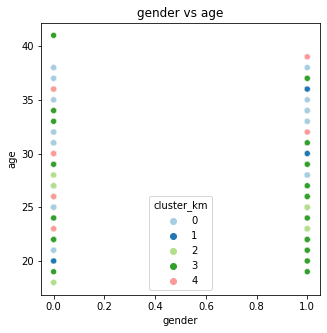

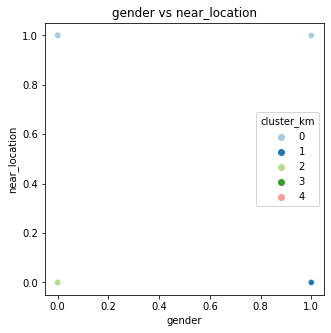

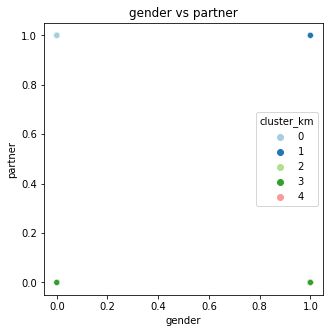

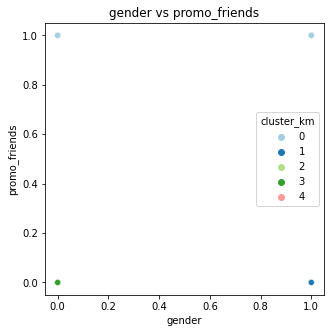

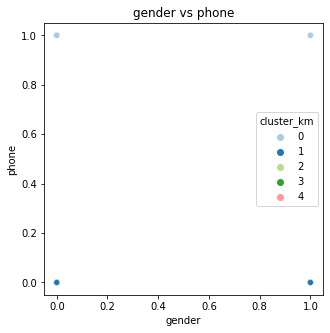

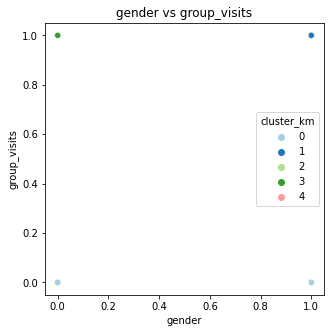

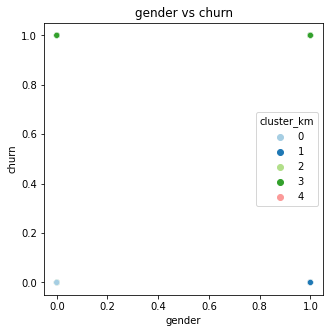

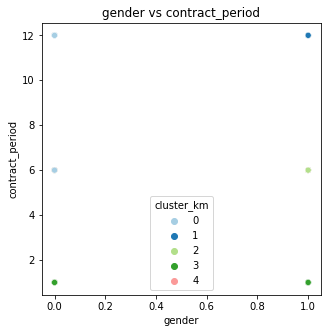

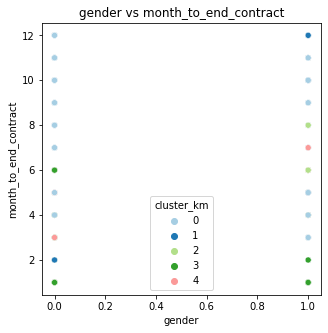

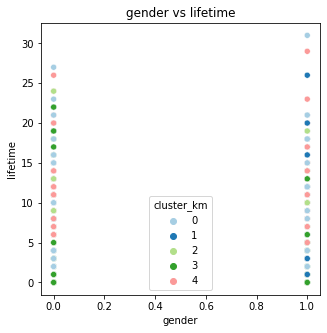

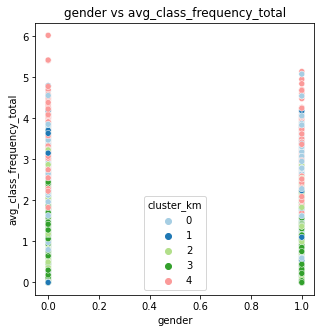

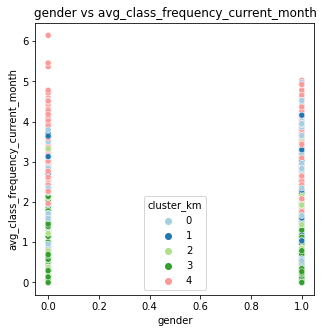

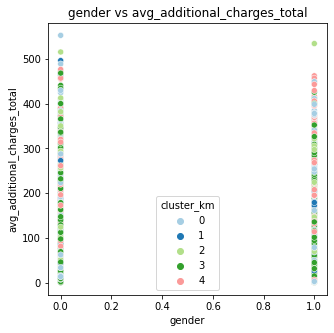

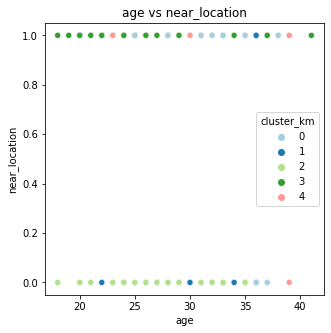

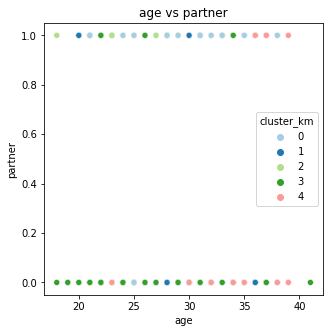

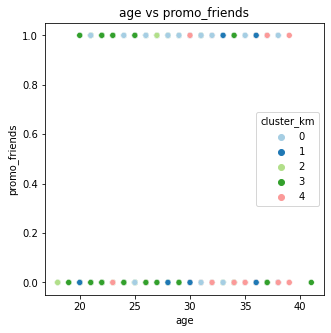

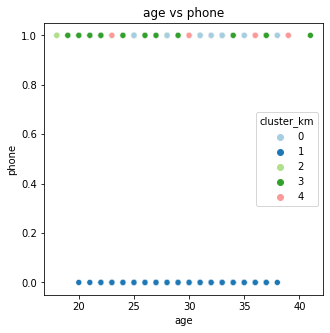

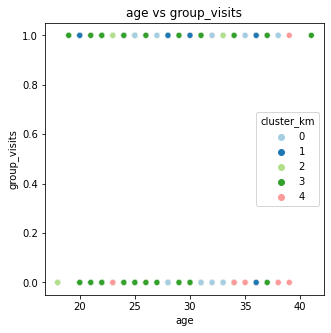

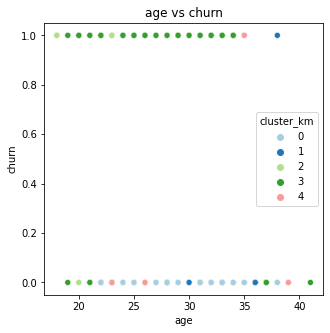

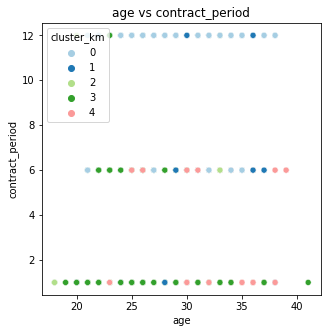

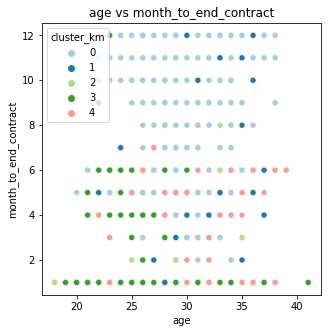

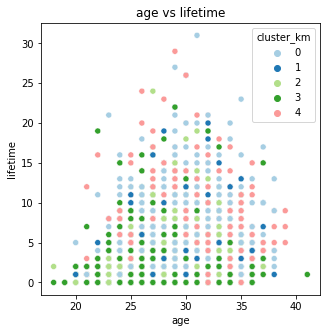

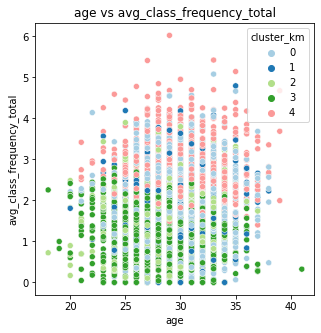

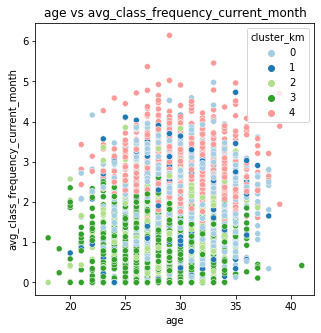

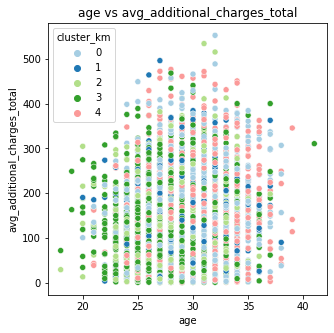

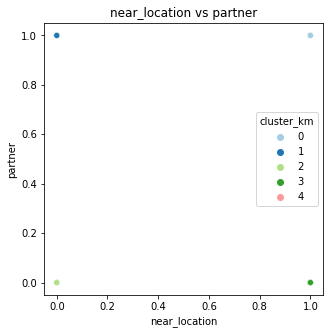

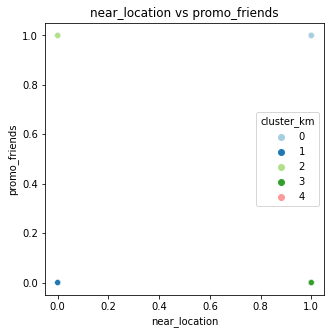

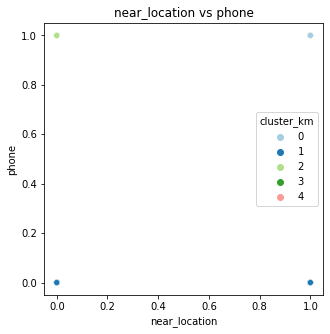

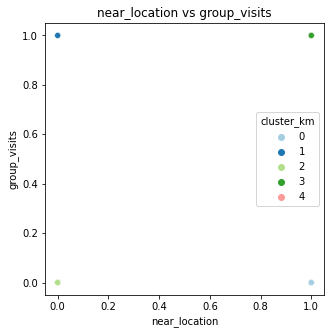

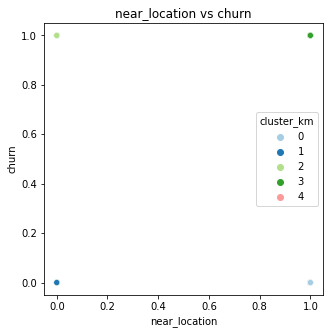

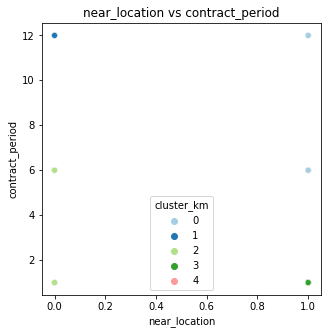

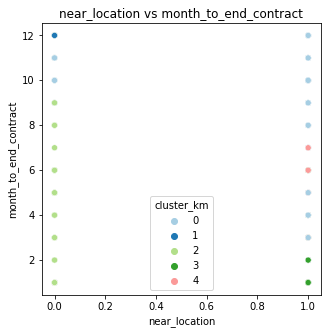

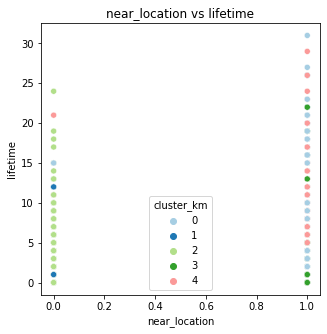

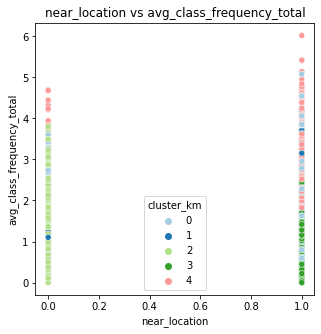

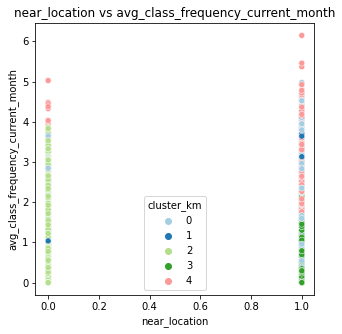

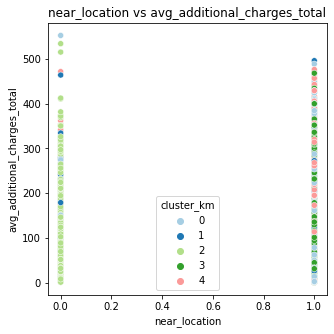

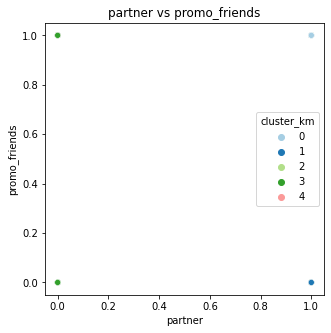

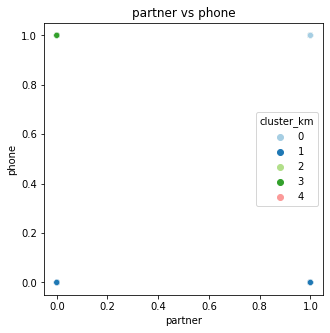

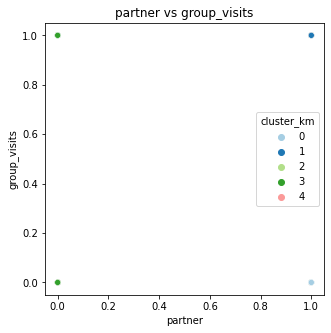

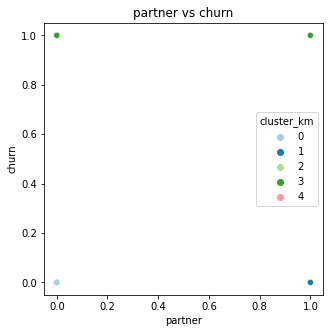

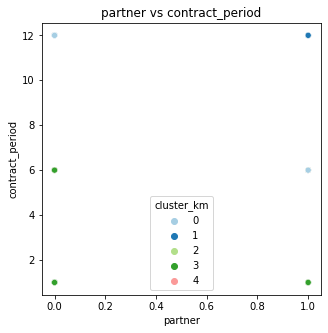

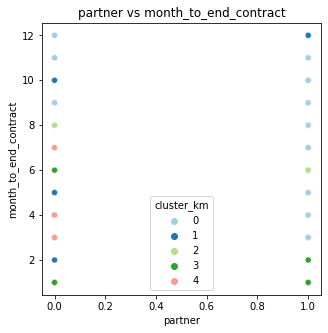

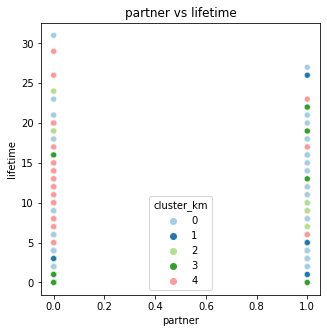

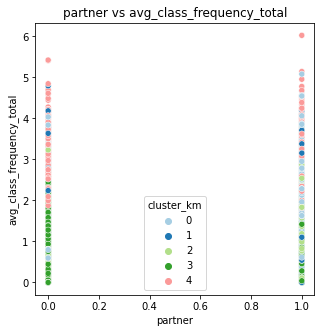

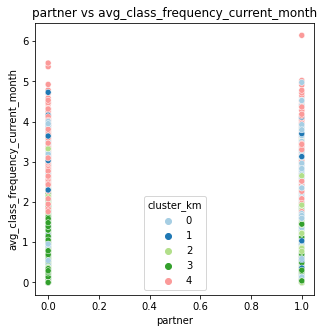

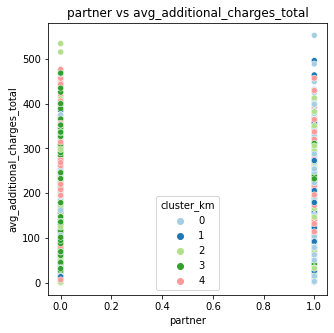

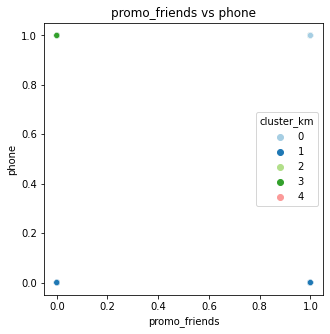

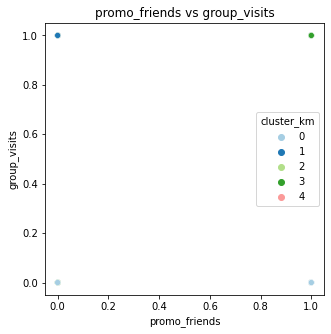

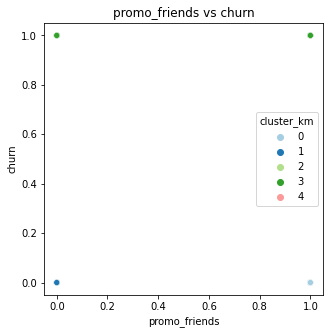

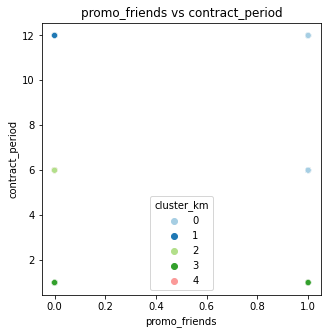

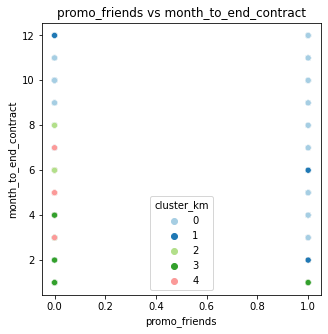

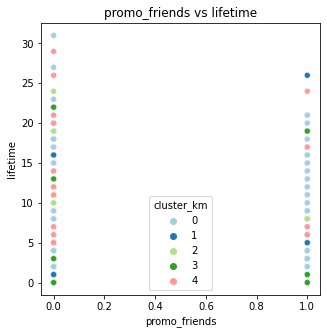

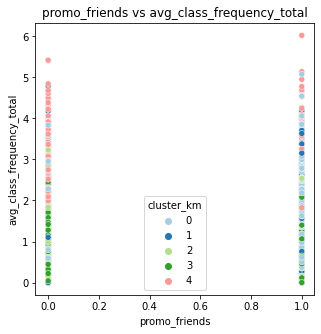

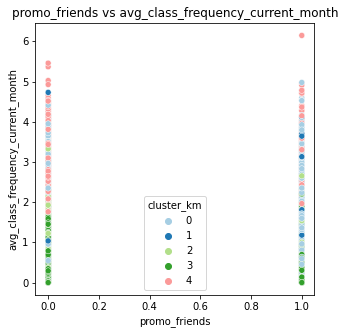

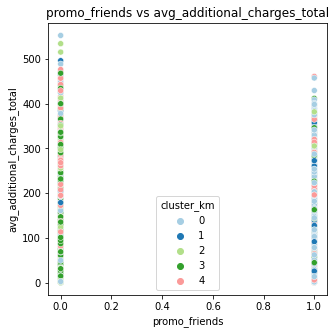

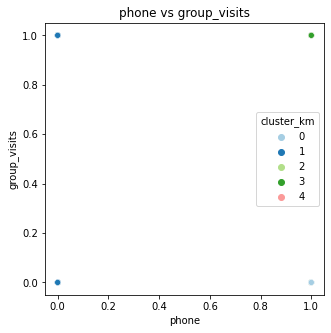

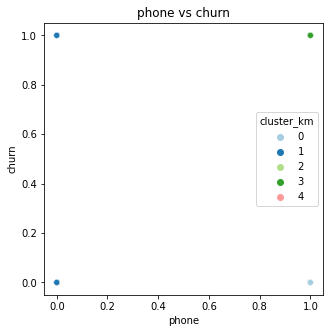

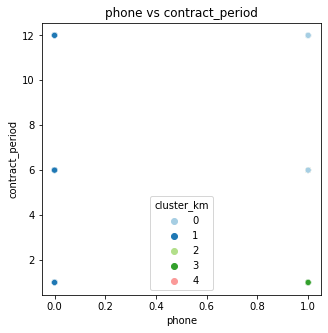

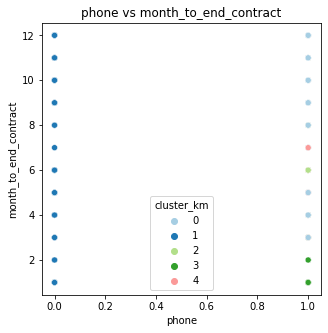

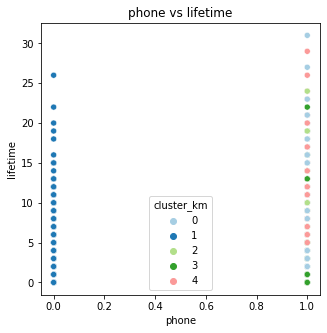

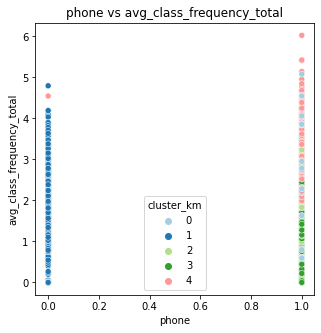

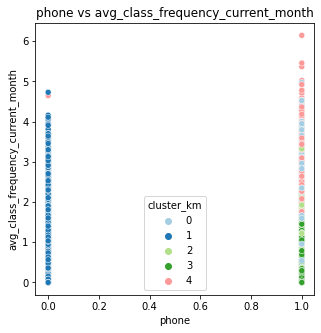

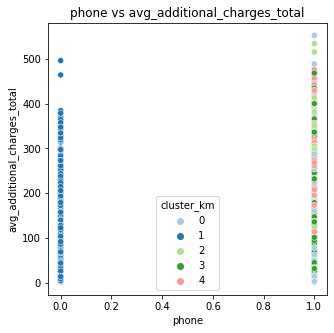

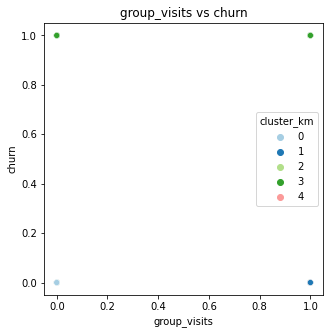

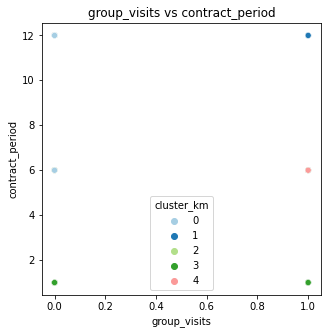

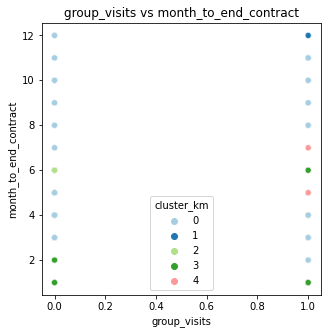

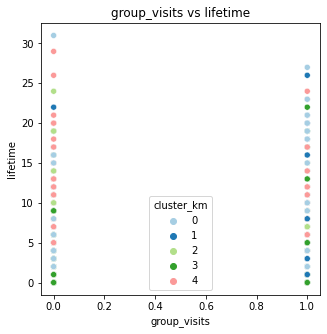

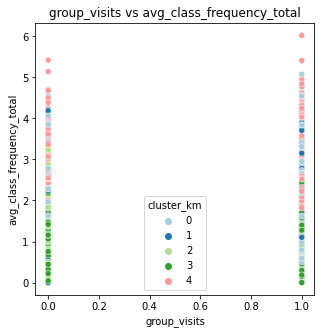

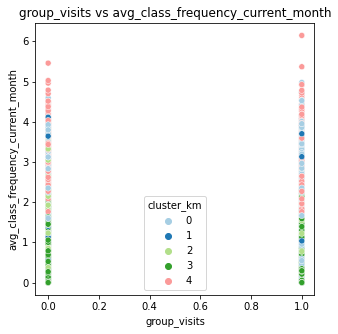

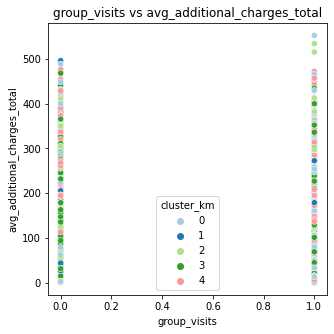

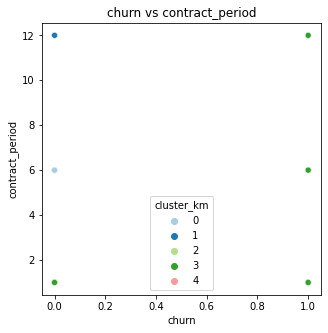

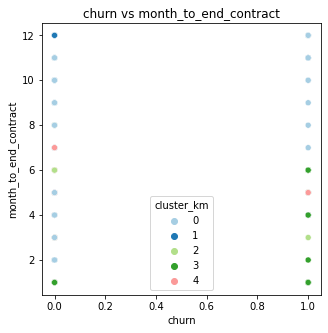

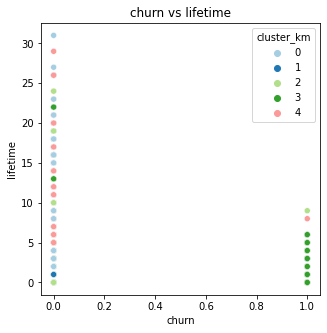

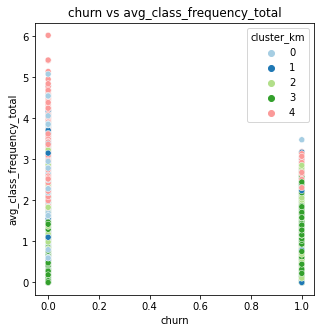

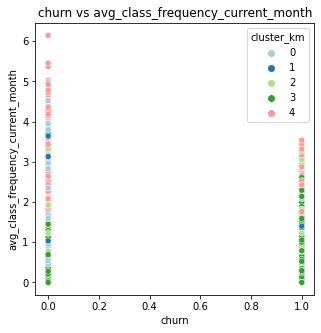

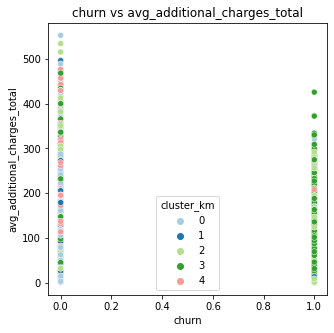

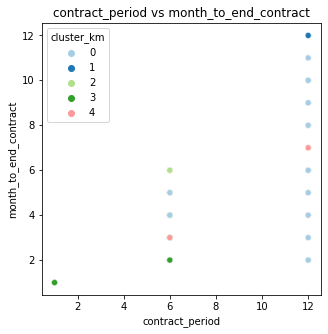

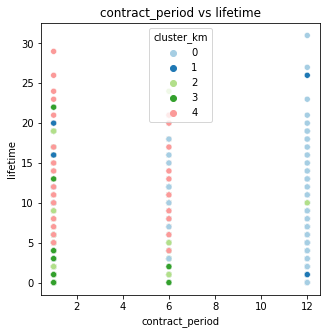

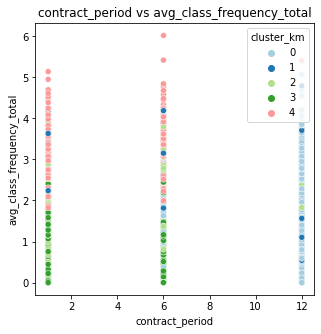

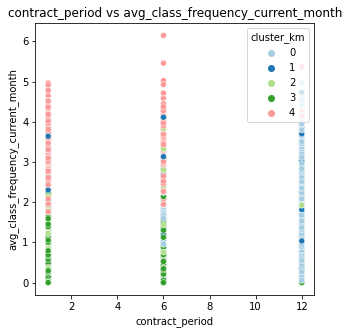

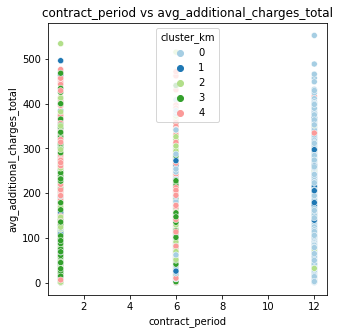

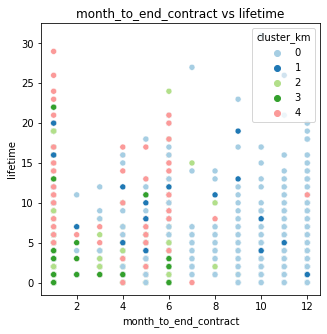

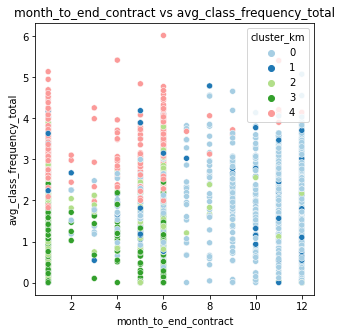

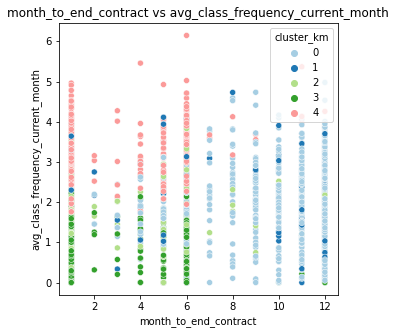

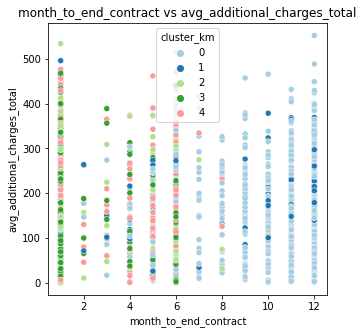

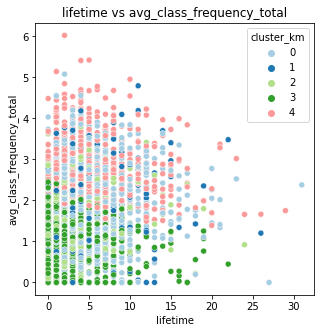

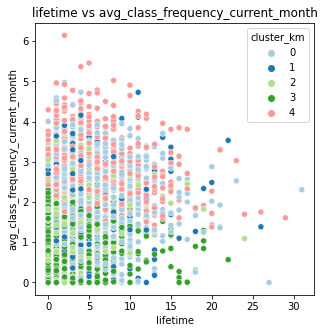

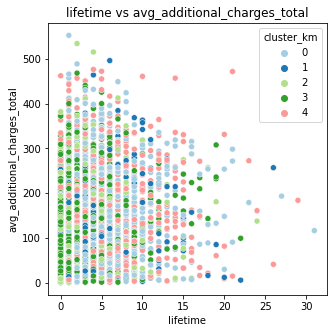

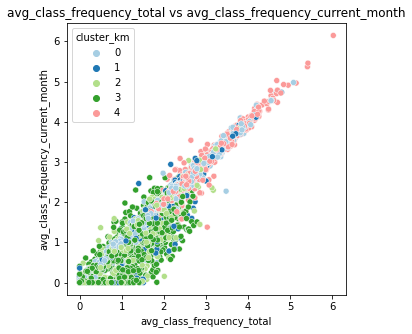

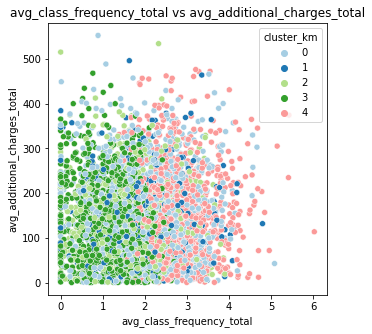

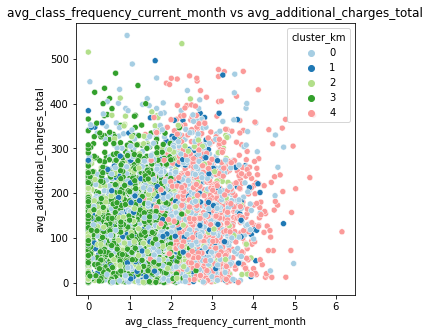

In [112]:
# рисуем графики

col_pairs = list(itertools.combinations(
    data.drop('cluster_km', axis=1).columns, 2)
)

for pair in col_pairs:
    show_clusters_on_plot(data, pair[0], pair[1], 'cluster_km')

По графикам можно определить следующие пограничные признаки:

* те, кто не оставил телефон, попали в кластер 1;


* те, кто не проживает в том же районе, попали в кластер 2;


* большинство тех, кто имеет абонемент на 12 месяцев, попали в кластер 0.


Посчитаем долю оттока для каждого полученного кластера, сгруппировав данные.

In [113]:
churn_km = data.pivot_table(
    index='cluster_km',
    columns='churn',
    values='gender',
    aggfunc='count'
    )

churn_km['churn_percent'] = round(
    churn_km[1] / (churn_km[0] + churn_km[1]) * 100, 2
    )

churn_km.sort_values(by='churn_percent', ascending=False)

churn,0,1,churn_percent
cluster_km,,,
3,613,649,51.43
2,281,224,44.36
1,282,103,26.75
4,781,57,6.80
0,982,28,2.77


**Вывод**

В ходе кластеризации клиенты были разделены на 5 кластеров.

Наиболее пограничными признаками для разделения являются наличие телефона в базе, проживание в одном районе с нахождением фитнес-центра, наличие абонемента на срок в 12 месяцев.

Уход из фитнес-центра более характерен для кластера 3 (51.43% оттока) и кластера 2 (44.36% оттока), а менее характерен для кластера 0 (2.77% оттока) и кластера 4 (6.68% оттока).

Учитывая пограничные признаки, можно предположить, что если посетитель не проживает в одном районе с фитнес-центром, то есть вероятность в 44%, что он перестанет ходить на занятия, но если у клиента абонемент на 12 месяцев, то такая вероятность снижается до 3%. Естественно, не стоит забывать, что другие признаки тоже влияют на отток.

## Общий вывод и рекомендации
<a class='anchor' id='summary'></a>

1. В ходе кластеризации клиенты были разделены на 5 кластеров.

    Наиболее пограничными признаками для разделения являются наличие телефона в базе, проживание в одном районе с нахождением фитнес-центра, наличие абонемента на срок в 12 месяцев.

    Уход из фитнес-центра более характерен для кластера 3 (51.43% оттока) и кластера 2 (44.36% оттока), а менее характерен для кластера 0 (2.77% оттока) и кластера 4 (6.68% оттока).
    

2. Вероятность оттока не зависит от пола и наличия телефона в базе фитнес-центра.

    Вероятность оттока менее зависит от возраста, района проживания, использования промо-акции или партнерской программы, посещения групповых занятий и средних трат на дополнительные услуги;

    Вероятность оттока более зависит от периода действия абонемента и, соответственно, периода до его окончания, количества посещений в неделю, особенно в последний месяц, а также от продолжительности посещения фитнес-центра.


3. Для построения модели прогнозирования оттока клиентов лучше всего подходит логистическая регрессия, т. к. она демонстрирует метрики accuracy, precision и recall лучше, чем случайный лес.

**Рекомендации**

1. Работать над тем, чтобы клиенты приобретали абонемент на более длительный срок и заранее продлевали срок действия абонемента. Это снижает вероятность оттока;


2. Развивать сеть партнеров и промо-акции. В отток попадает большинство посетителей, которые не участвовали в этих программах;


3. Предлагать клиентам посетить групповые занятия, это также снижает вероятность оттока;


4. Продолжать сохранять телефоны и информировать клиентов о том, что они не посетили фитнес-центр на предыдущей неделе, поскольку в отток уходят те, кто не посещал занятия в предыдущий месяц.